# Airbnb Descriptive

<p>Now that we have the predictive model complete, we now look to address the qualities that most affect the experience of Airbnb guests. 
Namely, these include quality features, bedrooms, bathrooms and seasonal features that enchance/detract from one's stay.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prices = pd.read_csv('../../data/Ames_Housing_Price_Data.csv',index_col = 0)


In [2]:
#Engineering new features relevant to Airbnb experience
prices['YrSinceUpdate'] = 2010-prices['YearRemodAdd']
prices.drop('YearRemodAdd',axis = 1,inplace = True)
prices['Total_FullBaths'] = prices['BsmtFullBath'] + prices['FullBath']
prices['Total_HalfBaths'] = prices['BsmtHalfBath'] + prices['HalfBath']
prices.drop(['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'],axis = 1, inplace = True)

In [3]:
airbnb_cols = ['PID','SalePrice','GrLivArea','BldgType','HouseStyle','OverallQual','OverallCond',
              'YearBuilt','YrSinceUpdate','ExterQual','ExterCond','BsmtQual','BsmtCond',
               'HeatingQC','CentralAir','Total_FullBaths','Total_HalfBaths','FireplaceQu',
              'BsmtFinType1','BsmtFinType2','BedroomAbvGr','KitchenQual','GarageQual','GarageCond',
               'PoolQC','MiscFeature','Functional',"Neighborhood",'Fence']


prices = prices[airbnb_cols]
prices

,PID,SalePrice,GrLivArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YrSinceUpdate,ExterQual,...,BsmtFinType2,BedroomAbvGr,KitchenQual,GarageQual,GarageCond,PoolQC,MiscFeature,Functional,Neighborhood,Fence
1,909176150,126000,856,1Fam,1Story,6,6,1939,60,TA,...,Unf,2,TA,TA,TA,NaN,NaN,Typ,SWISU,NaN
2,905476230,139500,1049,TwnhsE,1Story,5,5,1984,26,Gd,...,ALQ,2,Gd,TA,TA,NaN,NaN,Typ,Edwards,NaN
3,911128020,124900,1001,1Fam,1Story,5,9,1930,3,Gd,...,Unf,2,Gd,TA,Po,NaN,NaN,Typ,IDOTRR,NaN
4,535377150,114000,1039,1Fam,2Story,4,8,1900,7,Gd,...,Unf,2,TA,TA,TA,NaN,NaN,Typ,OldTown,NaN
5,534177230,227000,1665,1Fam,2Story,8,6,2001,9,Gd,...,Unf,3,Gd,TA,TA,NaN,NaN,Typ,NWAmes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,121000,952,1Fam,1.5Unf,6,6,1916,60,TA,...,Unf,2,Fa,Fa,Po,NaN,NaN,Typ,BrkSide,NaN
760,905402060,139600,1733,1Fam,1Story,3,5,1955,55,TA,...,NaN,4,TA,TA,TA,NaN,NaN,Min2,Edwards,NaN
761,909275030,145000,2002,Duplex,2Story,5,6,1949,60,TA,...,Unf,4,TA,TA,TA,NaN,NaN,Typ,Crawfor,NaN
762,907192040,217500,1842,1Fam,2Story,7,5,2000,10,Gd,...,Unf,3,Gd,TA,TA,NaN,NaN,Typ,CollgCr,NaN


### Ensure brand quality by filtering out lower quality houses

In [4]:
prices = prices.loc[(prices.BsmtFinType1!= 'LwQ') & (prices.BsmtFinType1 !='Unf')]
prices = prices.loc[(prices.BsmtFinType2!= 'LwQ') & (prices.BsmtFinType2 !='Unf')]
prices = prices.loc[(prices.Functional == 'Typ')&(prices.OverallQual >=5)&(prices.OverallCond >=5)]
prices.drop('Functional',axis = 1, inplace = True)

# Converting quality/condition categoricals to numerical

In [5]:
def ordinal_scale(Series):
    '''Returns a pandas Series where quality scores are converted to integers
    
    Args:
    
    Series: a pandas Series of categorical quality scores'''
    return prices[Series].replace({'Po':None,'Fa':1,'TA':2,'Gd':3,'Ex':4})

prices['KitchenQual'] = ordinal_scale('KitchenQual')
prices['ExterQual'] = ordinal_scale('ExterQual')
prices['ExterCond'] = ordinal_scale('ExterCond')
prices['HeatingQC'] = ordinal_scale('HeatingQC')

In [6]:
# prices['BsmtCond'].value_counts()

In [7]:
def switch_ordinals(Series):
    '''
    Returns a pandas series replacing null values with DNE (Does Not Exist) so they can be imputed.
    
    Args:
    

    Series: str, column name in the pandas dataframe.
    '''
    prices[Series].fillna('DNE',inplace = True)
    return prices[Series]
    
impute_cols = ['BsmtQual','BsmtCond','FireplaceQu',
               'BsmtFinType1','BsmtFinType2','GarageQual','GarageCond','PoolQC']




for i in impute_cols:
    prices[i] = switch_ordinals(i)

for i in impute_cols:
    prices[i].replace({'Po':None,'DNE':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace = True)
    
prices.update(prices[['Fence','MiscFeature']].fillna('None'))



In [8]:
prices.columns

Index(['PID', 'SalePrice', 'GrLivArea', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YrSinceUpdate', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir',
       'Total_FullBaths', 'Total_HalfBaths', 'FireplaceQu', 'BsmtFinType1',
       'BsmtFinType2', 'BedroomAbvGr', 'KitchenQual', 'GarageQual',
       'GarageCond', 'PoolQC', 'MiscFeature', 'Neighborhood', 'Fence'],
      dtype='object')

In [9]:
summer_cols = ['PoolQC','CentralAir']
winter_cols = ['FireplaceQu','HeatingQC']

In [10]:
nulls = prices.isnull().sum()
nulls[nulls>1]

FireplaceQu    4
dtype: int64

In [11]:
#prices['CentralAir'].replace({'N':0,'Y':1},inplace = True)


prices['Total_FullBaths'] = prices['Total_FullBaths'].fillna(prices['Total_FullBaths'].mean())
prices['Total_HalfBaths'] = prices['Total_HalfBaths'].fillna(prices['Total_HalfBaths'].mean())


In [12]:
nulls = prices.isnull().sum(axis = 0)
nulls[nulls>1]

FireplaceQu    4
dtype: int64

In [13]:
prices.dropna(axis = 0, how = 'any',inplace = True)

In [14]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 2 to 742
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              177 non-null    int64  
 1   SalePrice        177 non-null    int64  
 2   GrLivArea        177 non-null    int64  
 3   BldgType         177 non-null    object 
 4   HouseStyle       177 non-null    object 
 5   OverallQual      177 non-null    int64  
 6   OverallCond      177 non-null    int64  
 7   YearBuilt        177 non-null    int64  
 8   YrSinceUpdate    177 non-null    int64  
 9   ExterQual        177 non-null    int64  
 10  ExterCond        177 non-null    int64  
 11  BsmtQual         177 non-null    int64  
 12  BsmtCond         177 non-null    int64  
 13  HeatingQC        177 non-null    int64  
 14  CentralAir       177 non-null    object 
 15  Total_FullBaths  177 non-null    float64
 16  Total_HalfBaths  177 non-null    float64
 17  FireplaceQu     

# Merge housing data with Geopy data

In [15]:
latlon = pd.read_csv('../../data/full_latlon.csv')
latlon.head()

,PID,lat,lon,dist_stadium,dist_downtown,dist_airport,coord
0,526301100,42.053808,-93.618344,4.417461,3.210441,6.102121,"(42.053808, -93.618344)"
1,526302030,42.053668,-93.618459,4.399660,3.196132,6.086080,"(42.053668, -93.618459)"
2,526302040,42.053578,-93.618276,4.395200,3.184448,6.076963,"(42.05357834520508, -93.61827582597934)"
3,526302110,42.052841,-93.618633,4.308096,3.106740,5.993553,"(42.05284062808919, -93.61863289727206)"
4,526302120,42.052853,-93.618678,4.308129,3.108530,5.994682,"(42.05285252734815, -93.61867770937495)"


In [16]:
prices = pd.merge(prices, latlon, how='inner', left_on = 'PID', right_on = 'PID' )

In [17]:
prices = prices.drop_duplicates()
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 179
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              174 non-null    int64  
 1   SalePrice        174 non-null    int64  
 2   GrLivArea        174 non-null    int64  
 3   BldgType         174 non-null    object 
 4   HouseStyle       174 non-null    object 
 5   OverallQual      174 non-null    int64  
 6   OverallCond      174 non-null    int64  
 7   YearBuilt        174 non-null    int64  
 8   YrSinceUpdate    174 non-null    int64  
 9   ExterQual        174 non-null    int64  
 10  ExterCond        174 non-null    int64  
 11  BsmtQual         174 non-null    int64  
 12  BsmtCond         174 non-null    int64  
 13  HeatingQC        174 non-null    int64  
 14  CentralAir       174 non-null    object 
 15  Total_FullBaths  174 non-null    float64
 16  Total_HalfBaths  174 non-null    float64
 17  FireplaceQu     

Convert the distances from km to miles

In [18]:
prices['dist_airport']=prices['dist_airport']*0.621371
prices['dist_downtown']=prices['dist_downtown']*0.621371
prices['dist_stadium']=prices['dist_stadium']*0.621371
prices.sample(15)

,PID,SalePrice,GrLivArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YrSinceUpdate,ExterQual,...,PoolQC,MiscFeature,Neighborhood,Fence,lat,lon,dist_stadium,dist_downtown,dist_airport,coord
41,906226120,142953,2240,Duplex,2Story,5,5,1979,31,2,...,1,None,SawyerW,None,42.031287,-93.678944,2.456613,3.378865,3.668766,"(42.03128738326857, -93.67894361908435)"
147,535402140,172000,1651,1Fam,SLvl,7,5,1963,11,2,...,1,None,NAmes,MnPrv,42.039395,-93.607157,2.172682,1.044107,2.898972,"(42.03939524195497, -93.60715662003759)"
148,528360050,584500,3500,1Fam,2Story,9,5,1993,16,3,...,1,None,NoRidge,None,42.049414,-93.656185,2.522794,2.751261,3.893381,"(42.049413962912574, -93.6561853591516)"
14,531475220,160000,1882,Duplex,2Story,6,7,1981,29,2,...,1,None,SawyerW,None,42.035664,-93.683922,2.821416,3.680728,4.056647,"(42.035663809096576, -93.68392168757799)"
82,907201280,134900,914,1Fam,1Story,5,7,1979,31,2,...,1,None,CollgCr,None,42.019641,-93.686855,2.643120,3.778078,3.613497,"(42.01964106200265, -93.68685460834126)"
141,903484110,116000,1403,2fmCon,2Story,6,7,1915,45,2,...,1,None,IDOTRR,None,42.022958,-93.624182,0.754394,0.554040,1.659433,"(42.022957795918366, -93.62418206122449)"
114,916125425,228950,1786,2fmCon,1.5Fin,5,6,1965,45,2,...,1,Shed,Timber,None,41.998547,-93.658904,1.706102,2.957561,1.881236,"(41.99854744897959, -93.6589044489796)"
119,905426200,144500,1074,1Fam,1Story,6,7,1950,23,2,...,1,None,Edwards,MnPrv,42.026543,-93.663742,1.609678,2.571552,2.856799,"(42.02654288104371, -93.66374178824337)"
179,905107250,163000,1440,1Fam,2Story,5,5,1968,42,2,...,1,None,Sawyer,MnPrv,42.031349,-93.673578,2.211626,3.105752,3.456421,"(42.03134931935007, -93.67357792566746)"
157,535152070,143000,1144,1Fam,SLvl,5,6,1959,51,2,...,1,None,NAmes,None,42.043951,-93.617603,2.129623,1.315408,3.115338,"(42.043950501913415, -93.61760348302398)"


In [19]:
prices = prices.drop_duplicates()
prices.drop('coord',axis = 1, inplace = True)
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 179
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              174 non-null    int64  
 1   SalePrice        174 non-null    int64  
 2   GrLivArea        174 non-null    int64  
 3   BldgType         174 non-null    object 
 4   HouseStyle       174 non-null    object 
 5   OverallQual      174 non-null    int64  
 6   OverallCond      174 non-null    int64  
 7   YearBuilt        174 non-null    int64  
 8   YrSinceUpdate    174 non-null    int64  
 9   ExterQual        174 non-null    int64  
 10  ExterCond        174 non-null    int64  
 11  BsmtQual         174 non-null    int64  
 12  BsmtCond         174 non-null    int64  
 13  HeatingQC        174 non-null    int64  
 14  CentralAir       174 non-null    object 
 15  Total_FullBaths  174 non-null    float64
 16  Total_HalfBaths  174 non-null    float64
 17  FireplaceQu     

In [20]:
prices['Neighborhood'].value_counts()

NAmes      57
Edwards    16
Sawyer     15
NWAmes     14
SawyerW    11
Mitchel     9
CollgCr     7
NoRidge     6
Timber      5
Veenker     4
Somerst     4
OldTown     4
NridgHt     3
IDOTRR      3
ClearCr     3
Crawfor     3
Gilbert     2
NPkVill     2
BrkSide     2
StoneBr     2
MeadowV     1
SWISU       1
Name: Neighborhood, dtype: int64

In [21]:
prices['stadium_transp'] = prices['dist_stadium'].apply(
    lambda x: 'walking' if x <= 0.3 else ('biking' if x <= 3 else 'driving'))

In [22]:
ideal_homes = prices.drop(['PID','Neighborhood','stadium_transp'],axis = 1)

In [23]:
prices['stadium_transp'].value_counts()

biking     165
driving      7
walking      2
Name: stadium_transp, dtype: int64

In [24]:
prices.loc[prices.stadium_transp == 'walking']

,PID,SalePrice,GrLivArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YrSinceUpdate,ExterQual,...,PoolQC,MiscFeature,Neighborhood,Fence,lat,lon,dist_stadium,dist_downtown,dist_airport,stadium_transp
46,909282130,144800,1112,1Fam,1Story,5,6,1954,56,2,...,1,None,Crawfor,MnPrv,42.016043,-93.639473,0.194167,1.461358,1.471981,walking
56,909281080,257500,2133,1Fam,1.5Fin,7,6,1941,25,3,...,1,None,Crawfor,None,42.016308,-93.639600,0.200568,1.459616,1.490563,walking


In [25]:
airbnb_winter = ideal_homes.drop(summer_cols,axis = 1)
airbnb_summer = ideal_homes.drop(winter_cols,axis = 1)

In [26]:
ideal_homes.columns

Index(['SalePrice', 'GrLivArea', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YrSinceUpdate', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'Total_FullBaths',
       'Total_HalfBaths', 'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2',
       'BedroomAbvGr', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC',
       'MiscFeature', 'Fence', 'lat', 'lon', 'dist_stadium', 'dist_downtown',
       'dist_airport'],
      dtype='object')

In [27]:
ideal_homes['Fence'].value_counts()

None     127
MnPrv     29
GdWo       9
GdPrv      7
MnWw       2
Name: Fence, dtype: int64

## Reducing to numeric features

In [28]:
airbnb_summer.sample(5)

,SalePrice,GrLivArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YrSinceUpdate,ExterQual,ExterCond,...,GarageQual,GarageCond,PoolQC,MiscFeature,Fence,lat,lon,dist_stadium,dist_downtown,dist_airport
93,141000,2233,Duplex,2Story,5,6,1979,31,2,2,...,3,4,1,None,None,42.018901,-93.674396,1.999920,3.147304,3.011294
134,169000,2320,1Fam,2Story,5,6,1948,60,2,2,...,3,3,1,None,None,42.059266,-93.622171,3.052665,2.396834,4.162762
30,217000,2259,1Fam,1Story,6,5,1953,57,2,3,...,3,3,1,None,MnPrv,42.012656,-93.639558,0.314998,1.579332,1.295215
61,120000,879,1Fam,1Story,5,6,1975,35,2,2,...,3,3,1,None,None,42.021082,-93.684519,2.534682,3.649553,3.545045
115,128000,984,1Fam,1Story,5,5,1963,47,2,2,...,3,3,1,Shed,MnPrv,42.036070,-93.674410,2.418085,3.208936,3.706369


In [29]:
cats = ideal_homes.select_dtypes(object).columns
cats

Index(['BldgType', 'HouseStyle', 'CentralAir', 'BsmtFinType1', 'BsmtFinType2',
       'MiscFeature', 'Fence'],
      dtype='object')

In [30]:
dummy = pd.get_dummies(ideal_homes, columns = cats,drop_first=True)

In [31]:
dummy[['dist_stadium']].sample(15)

,dist_stadium
47,2.265772
104,2.250869
89,2.180376
29,1.252115
131,2.091177
86,2.549643
120,1.513398
67,2.996721
78,2.940553
134,3.052665


<AxesSubplot:>

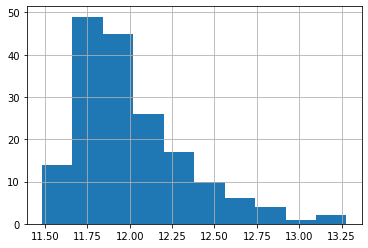

In [32]:
Y = np.log(dummy['SalePrice'])
X = dummy.drop(['SalePrice'],axis = 1)
Y.hist()

In [33]:
X_columns = dummy.drop(['SalePrice'],axis = 1).columns
X_columns

Index(['GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YrSinceUpdate',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
       'Total_FullBaths', 'Total_HalfBaths', 'FireplaceQu', 'BedroomAbvGr',
       'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'lat', 'lon',
       'dist_stadium', 'dist_downtown', 'dist_airport', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'CentralAir_Y', 'BsmtFinType1_ALQ',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_Rec',
       'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ',
       'BsmtFinType2_Rec', 'MiscFeature_None', 'MiscFeature_Shed',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_None'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X,Y)

LinearRegression()

In [36]:
print(reg.score(X,Y))


from sklearn.metrics import mean_squared_error
Ypred = reg.predict(X)
RMSE = mean_squared_error(Y,Ypred,squared = False)
print(RMSE)

0.9410599286583101
0.08101629817472833


In [37]:
for col, coef in zip(X_columns, reg.coef_):
    print(f'{col}: {coef}')

GrLivArea: 0.18374318684174157
OverallQual: 0.07458822151873554
OverallCond: 0.035823795673820005
YearBuilt: 0.03137931569462753
YrSinceUpdate: 0.004392269164177072
ExterQual: 0.004075648467482769
ExterCond: -0.021167643801287106
BsmtQual: 0.0773506607717467
BsmtCond: 0.0306827084094543
HeatingQC: 0.006682771323363583
Total_FullBaths: 0.03686597893991956
Total_HalfBaths: 0.0021089364802419353
FireplaceQu: 0.04201207390905411
BedroomAbvGr: -0.011375650308694255
KitchenQual: 0.0074039722646532455
GarageQual: 0.017316618005525128
GarageCond: 0.007996209943284985
PoolQC: -2.0816681711721685e-17
lat: 0.05243870575241063
lon: 0.022057047819228338
dist_stadium: -0.0029876356674291837
dist_downtown: 0.05529515107955075
dist_airport: -0.04643535562589495
BldgType_2fmCon: 0.01208188977578378
BldgType_Duplex: -0.013230964846106317
BldgType_Twnhs: -0.02338620241014543
BldgType_TwnhsE: -0.020213609524105627
HouseStyle_1Story: 0.06708512877493017
HouseStyle_2Story: 0.008835988793451922
HouseStyle_SF

Text(0.5, 1.0, 'Standardized feature betas in log(SalePrice) linear model')

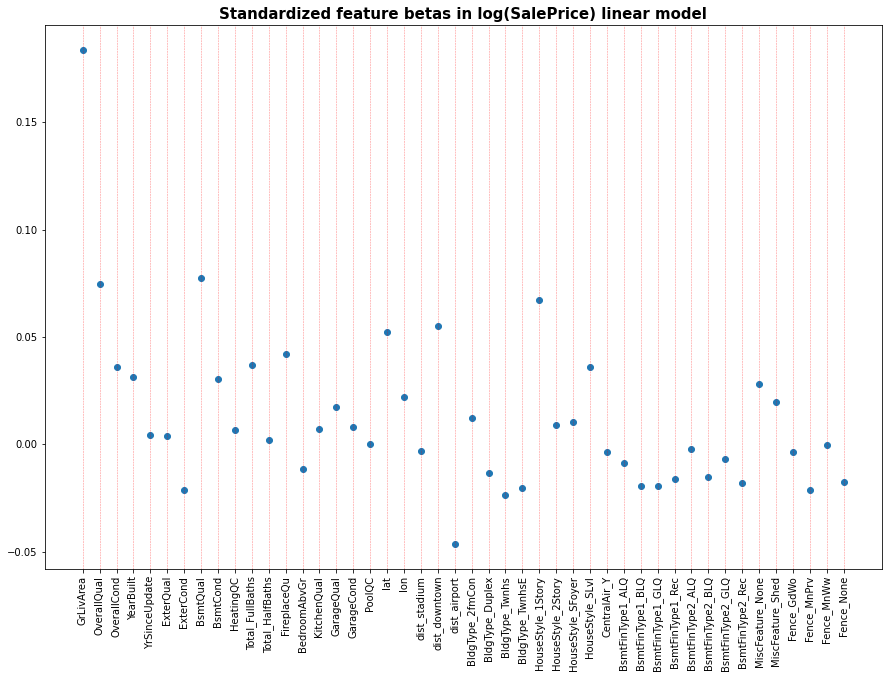

In [41]:
plt.figure(figsize = (15,10))
plt.scatter(list(range(len(X_columns))),reg.coef_)
plt.xticks(list(range(len(X_columns))),labels = X_columns, rotation = 90)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis = 'x',alpha = 0.5)
plt.title('Standardized feature betas in log(SalePrice) linear model', fontsize = 15, fontweight = 'bold')


In [43]:
import statsmodels.api as sm

In [ ]:
s